Imports

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

### Load the dataset

In [32]:
columns = ["H1CO1","H1MO1","H1MO2","H1MO3","H1MO4","H1MO5","H1MO8","H1MO9","H1MO10","H1MO11","H1MO13","BIO_SEX"]

AH_data = pd.read_csv("../../data/addhealth_pds.csv", usecols=columns)

filter_answers = [6,8,9]

data_filter1 = AH_data.dropna()[~AH_data['H1CO1'].isin(filter_answers)]

data_clean = data_filter1[~data_filter1['H1MO4'].isin([7])]

data_clean.dtypes

BIO_SEX    int64
H1MO1      int64
H1MO2      int64
H1MO3      int64
H1MO4      int64
H1MO5      int64
H1MO8      int64
H1MO9      int64
H1MO10     int64
H1MO11     int64
H1MO13     int64
H1CO1      int64
dtype: object

In [13]:
data_clean.describe()

BIO_SEX        H1MO1        H1MO2        H1MO3        H1MO4  \
count  6418.000000  6418.000000  6418.000000  6418.000000  6418.000000   
mean      1.517607     4.704269     4.621222     4.302275     3.891399   
std       0.499729     1.815157     1.895024     2.148369     2.551734   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     3.000000     3.000000     3.000000     1.000000   
50%       2.000000     4.000000     4.000000     4.000000     3.000000   
75%       2.000000     7.000000     7.000000     7.000000     7.000000   
max       2.000000     9.000000     9.000000     9.000000     9.000000   

             H1MO5       H1MO8        H1MO9       H1MO10       H1MO11  \
count  6418.000000  6418.00000  6418.000000  6418.000000  6418.000000   
mean      4.086476     4.64771     3.881739     3.877220     4.719383   
std       2.255152     1.87295     2.431587     2.445072     1.885519   
min       1.000000     1.00000     1.000000     1.000000     1.000000   
25%       2.000000     3.00000     2.000000     2.000000     4.000000   
50%       3.000000     4.00000     3.000000     3.000000     4.000000   
75%       7.000000     7.00000     7.000000     7.000000     7.000000   
max       9.000000     9.00000     9.000000     9.000000     9.000000   

           H1MO13        H1CO1  
count  6418.00000  6418.000000  
mean      3.72546     0.399657  
std       2.47903     0.489866  
min       1.00000     0.000000  
25%       2.00000     0.000000  
50%       3.00000     0.000000  
75%       7.00000     1.000000  
max       9.00000     1.000000

## Modeling and Prediction

### Split into training and testing sets

In [33]:
predictors = data_clean[["H1MO1","H1MO2","H1MO3","H1MO4","H1MO5","H1MO8","H1MO9","H1MO10","H1MO11","H1MO13","BIO_SEX"]]

targets = data_clean.H1CO1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape

(2464, 11)

In [16]:
pred_test.shape

(2568, 11)

In [17]:
tar_train.shape

(3850,)

In [18]:
tar_test.shape

(2568,)

### Build model on training data

In [34]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [35]:
predictions=classifier.predict(pred_test)

In [36]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[528, 329],
       [320, 467]])

In [37]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.60523114355231145

### Displaying the decision tree
Importing extra things

In [23]:
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
import pydotplus

In [38]:
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [44]:
#Rerunning with fewer predictors
predictors2 = data_clean[["H1MO3","H1MO4","H1MO10"]]

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors2, targets, test_size=.4)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)
sklearn.metrics.confusion_matrix(tar_test,predictions)


array([[579, 242],
       [316, 507]])

In [45]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.66058394160583944

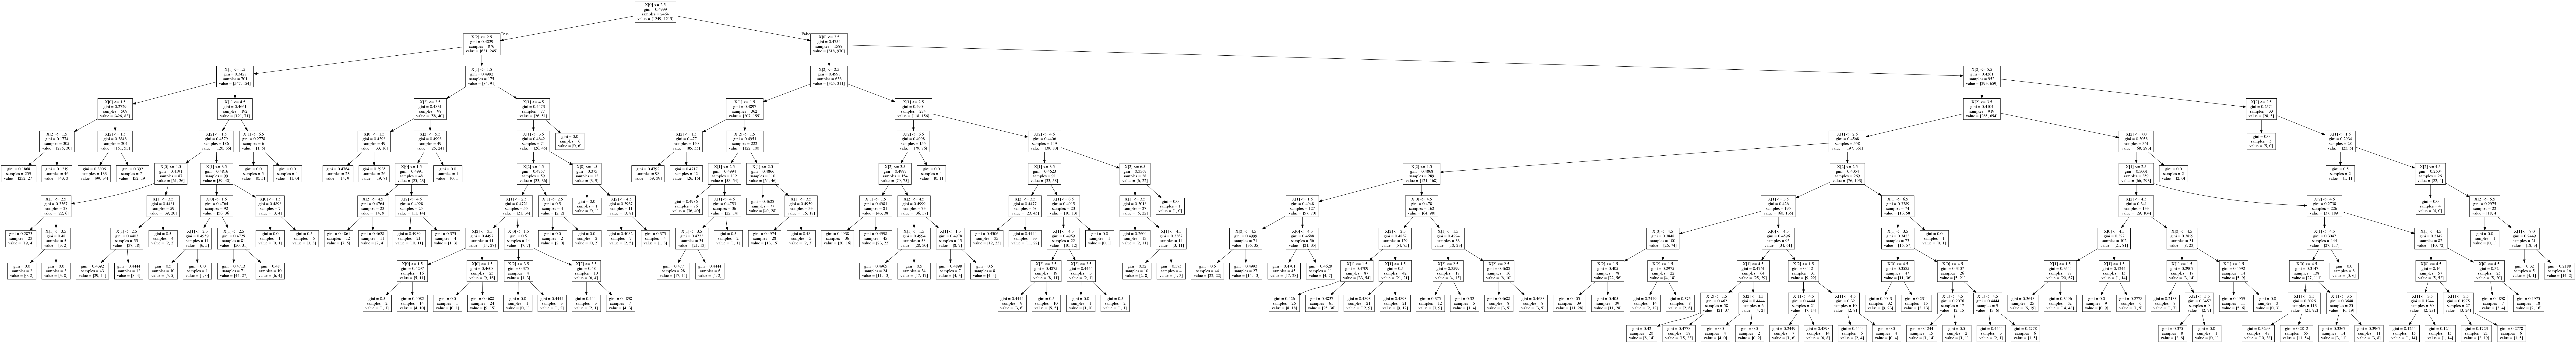

In [46]:
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())